# SNS 이용 데이터를 통한 문제점 및 인식 확인
- 배경 : 정보화 시대가 빠르게 다가옴으로써 SNS의 문제점 대두
- 목표 : SNS 이용시간 단축 및 바른 SNS 문화 확립
- 기대효과 : SNS 과다사용에 문제 유형을 한눈에 알아보기 쉽게 제시


- 1일 평균 SNS 이용시간 데이터
- SNS 이용 과다사용에 대한 인식 데이터
- SNS 과다사용으로 발생한 문제 유형 데이터
- 각 데이터셋에는 낱개의 데이터가 있는 것이 아니라 소계별로 짜여져있음

In [41]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Load & EDA

In [126]:
# 1. 1일 평균 SNS 이용시간 데이터 불러오기
UT_df = pd.read_csv("./data/project/1일 평균 SNS 이용시간.csv", engine='python')

In [127]:
# 1-1. 데이터 타입 및 null값 확인
UT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구분         15 non-null     object
 1   <1H        15 non-null     int64 
 2   1H<=, <2H  15 non-null     int64 
 3   2H<=, <3H  15 non-null     int64 
 4   3H<=, <4H  15 non-null     int64 
 5   4H<=, <5H  15 non-null     int64 
 6   5H<=, <6H  15 non-null     int64 
 7   6H<=       15 non-null     int64 
 8   전체         15 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.2+ KB


In [128]:
# 1-2. 데이터 구조확인
print("UT_df.index =", UT_df.index)
print("UT_df.columns =", UT_df.columns)
print("UT_df.shape =", UT_df.shape)

UT_df.index = RangeIndex(start=0, stop=15, step=1)
UT_df.columns = Index(['구분', '<1H', '1H<=, <2H', '2H<=, <3H', '3H<=, <4H', '4H<=, <5H',
       '5H<=, <6H', '6H<=', '전체'],
      dtype='object')
UT_df.shape = (15, 9)


In [129]:
# 1-3. 전체적인 데이터 확인
UT_df

,구분,<1H,"1H<=, <2H","2H<=, <3H","3H<=, <4H","4H<=, <5H","5H<=, <6H",6H<=,전체
0,전체,2617,1815,188,56,18,14,5,4716
1,청소년,890,587,53,19,8,6,0,1565
2,성인,1727,1229,132,41,13,6,3,3151
3,만9~12세,293,179,14,5,3,1,0,497
4,만13~15세,256,161,13,3,3,2,0,437
5,만16~19세,341,247,27,11,2,3,1,631
6,만20~24세,345,241,26,6,4,1,0,622
7,만25~29세,437,317,33,8,2,1,1,798
8,만30~34세,467,302,32,8,2,3,2,815
9,만35~39세,477,369,44,19,4,3,1,916


In [130]:
# 2. SNS 이용 과다사용에 대한 인식 데이터 불러오기
UR_df = pd.read_csv("./data/project/SNS 이용 과다사용에 대한 인식.csv", engine='python')

In [131]:
# 2-1. 데이터 타입 및 null값 확인
UR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   구분          15 non-null     object
 1   매우 그렇다      15 non-null     int64 
 2   그런 편이다      15 non-null     int64 
 3   그렇지 않은 편이다  15 non-null     int64 
 4   전혀 그렇지 않다   15 non-null     int64 
 5   전체          15 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 848.0+ bytes


In [132]:
# 2-2. 데이터 구조 확인
print("UR_df.index =", UR_df.index)
print("UR_df.columns =", UR_df.columns)
print("UR_df.shape =", UR_df.shape)

UR_df.index = RangeIndex(start=0, stop=15, step=1)
UR_df.columns = Index(['구분', '매우 그렇다', '그런 편이다', '그렇지 않은 편이다', '전혀 그렇지 않다', '전체'], dtype='object')
UR_df.shape = (15, 6)


In [133]:
# 2-3. 전체적인 데이터 확인
UR_df

,구분,매우 그렇다,그런 편이다,그렇지 않은 편이다,전혀 그렇지 않다,전체
0,전체,66,453,2933,1264,4716
1,청소년,6,86,989,484,1565
2,성인,9,192,1840,1109,3151
3,만9∼12세,1,29,302,166,497
4,만13∼15세,3,20,291,123,437
5,만16∼19세,2,37,396,196,631
6,만20∼24세,1,37,389,195,622
7,만25∼29세,3,34,453,308,798
8,만30∼34세,2,51,482,280,815
9,만35∼39세,3,70,516,328,916


In [134]:
# 3. SNS 과다사용으로 발생한 문제 유형 데이터 불러오기
UP_df=pd.read_csv("./data/project/SNS 과다사용으로 발생한 문제 유형.csv", engine='python')

In [135]:
# 3-1. 데이터 타입 및 null값 확인
UP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   구분                15 non-null     object
 1   학업성적이나 업무효율이 떨어짐  15 non-null     int64 
 2   가족이나 친구관계가 나빠짐    15 non-null     int64 
 3   건강이 나빠짐           15 non-null     int64 
 4   심리적으로 불안정해짐       15 non-null     int64 
 5   다른 활동에 대해 흥미를 잃음  15 non-null     int64 
 6   기타                15 non-null     int64 
 7   전체                15 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.1+ KB


In [136]:
# 3-2. 데이터 구조확인
print("UP_df.index =", UP_df.index)
print("UP_df.columns =", UP_df.columns)
print("UP_df.shape =", UP_df.shape)

UP_df.index = RangeIndex(start=0, stop=15, step=1)
UP_df.columns = Index(['구분', '학업성적이나 업무효율이 떨어짐', '가족이나 친구관계가 나빠짐', '건강이 나빠짐', '심리적으로 불안정해짐',
       '다른 활동에 대해 흥미를 잃음', '기타', '전체'],
      dtype='object')
UP_df.shape = (15, 8)


In [137]:
# 3-3. 전체적인 데이터 확인
UP_df

,구분,학업성적이나 업무효율이 떨어짐,가족이나 친구관계가 나빠짐,건강이 나빠짐,심리적으로 불안정해짐,다른 활동에 대해 흥미를 잃음,기타,전체
0,전체,23,1,6,7,13,2,40
1,청소년,12,1,4,3,6,2,20
2,성인,11,0,2,3,6,0,19
3,만9∼12세,3,0,0,2,1,0,4
4,만13∼15세,3,0,1,0,2,0,5
5,만16∼19세,5,1,2,1,3,1,11
6,만20∼24세,0,0,0,0,1,0,1
7,만25∼29세,5,0,0,2,1,0,6
8,만30∼34세,1,0,0,0,2,0,3
9,만35∼39세,5,0,2,1,3,0,10


## 2. Data Visualization
- 전체, 청소년/성인, 나이대별, 성별, 도시별로 각 주제의 데이터 시각화

### 2-1) 1일 SNS 이용시간에 대한 시각화
- 모든 카테고리별로 비슷한 양상을 보임
- 카테고리별 1시간 미만 이용하는 표본이 가장 많고, 6시간 이상 이용하는 표본이 가장 적다
- 데이터의 90% 이상이 2시간 미만에 머무름

In [161]:
colors = sns.color_palette('hls',len(UT_df['구분']))

Text(0.5, 1.0, '전체 표본 SNS 이용시간')

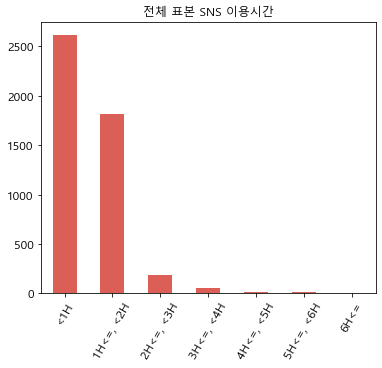

In [162]:
# 전체 표본을 대상으로 SNS 이용시간 확인
plt.figure(1, figsize=(6,5))
plt.rc("font", family='Malgun Gothic')
UT_df.iloc[0,1:8].plot.bar(rot=60, color=colors[0], fontsize=12)
plt.title("전체 표본 SNS 이용시간")

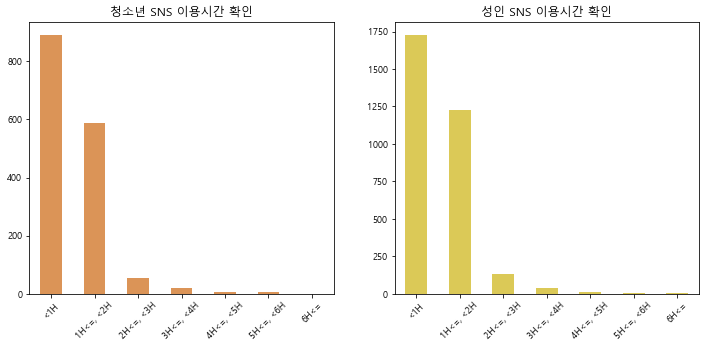

In [168]:
# 청소년과 성인의 SNS 이용시간 확인
plt.figure(1, figsize=(12, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    UT_df.iloc[i+1, 1:8].plot.bar(rot=45, color=colors[i+1] ,fontsize=9)
    plt.title("{} SNS 이용시간 확인".format(UT_df['구분'][i+1]))
    
    
# 청소년과 성인의 SNS 이용시간 분포의 큰 차이는 보이지 않음

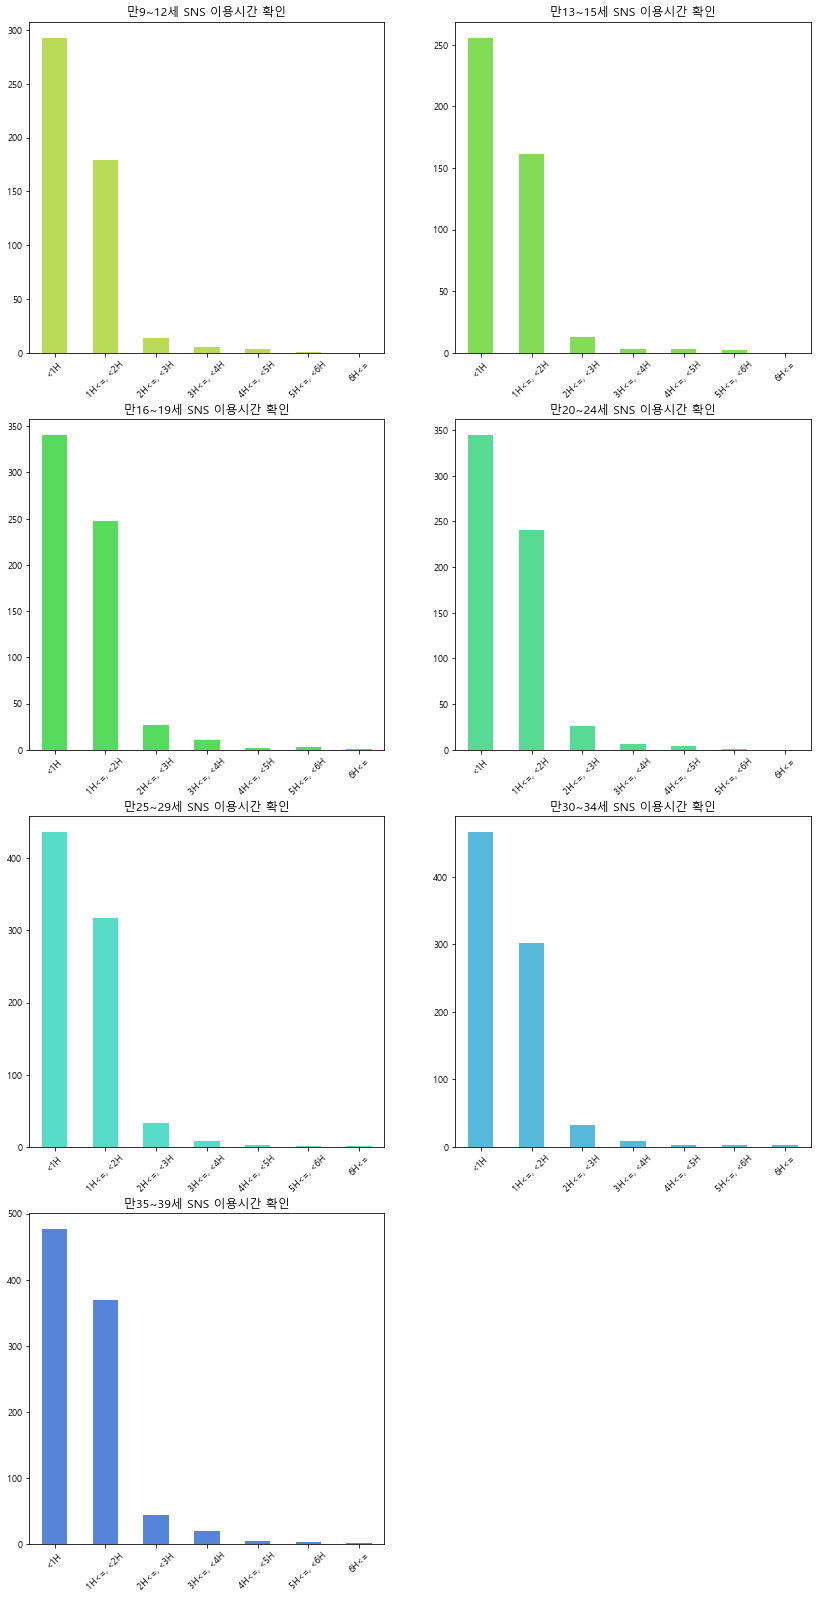

In [167]:
# 나이대별 SNS 이용시간 확인
plt.figure(1, figsize=(14, 28))
for i in range(7):
    plt.subplot(4, 2, i+1)
    UT_df.iloc[i+3, 1:8].plot.bar(rot=45, color=colors[i+3] ,fontsize=9)
    plt.title("{} SNS 이용시간 확인".format(UT_df['구분'][i+3]))
    
# 나이대별 SNS 이용시간 분포의 큰 차이는 보이지 않음

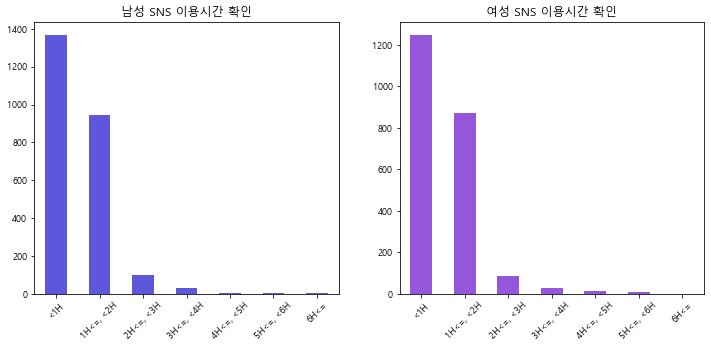

In [170]:
# 성별 SNS 이용시간 확인
plt.figure(1, figsize=(12, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    UT_df.iloc[i+10, 1:8].plot.bar(rot=45, color=colors[i+10] ,fontsize=9)
    plt.title("{} SNS 이용시간 확인".format(UT_df['구분'][i+10]))
    
# 성별 SNS 이용시간 분포의 큰 차이는 보이지 않음

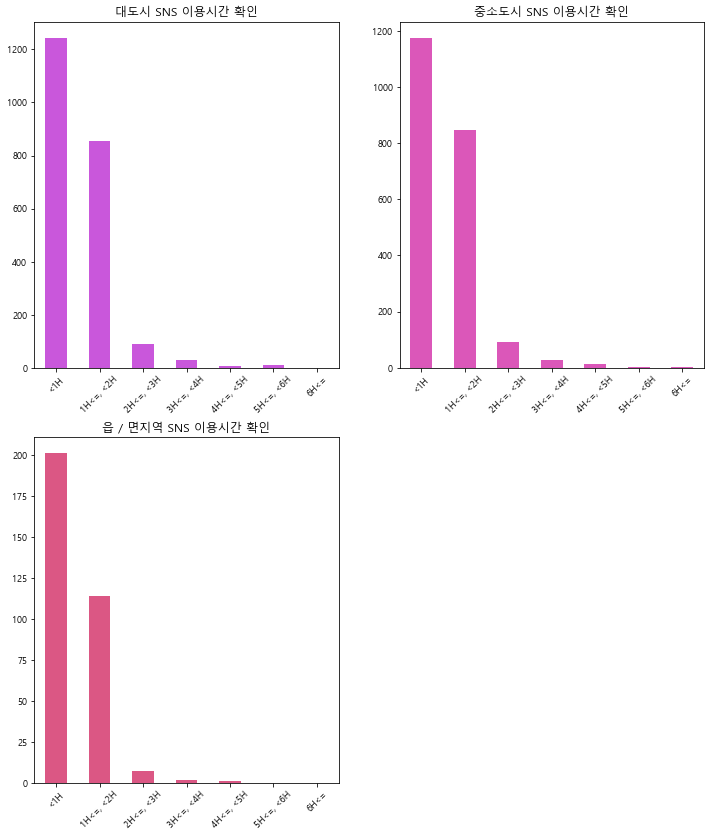

In [175]:
# 도시별 SNS 이용시간 확인
plt.figure(1, figsize=(12, 14))
for i in range(3):
    plt.subplot(2, 2, i+1)
    UT_df.iloc[i+12, 1:8].plot.bar(rot=45, color=colors[i+12] ,fontsize=9)
    plt.title("{} SNS 이용시간 확인".format(UT_df['구분'][i+12]))
    
# 도시별 SNS 이용시간 분포의 큰 차이는 보이지 않음

### 2-2) SNS 이용 과다사용에 대한 인식에 대한 시각화
- '매우 그렇다'부터 '전혀 그렇지 않다'까지 4가지 척도로 구성된 데이터
- 모든 카테고리별로 비슷한 양상을 보임
- 대체적으로 SNS를 과다사용하지 않는다고 생각하는 편

Text(0.5, 1.0, '전체 표본의 SNS 과다사용 인식')

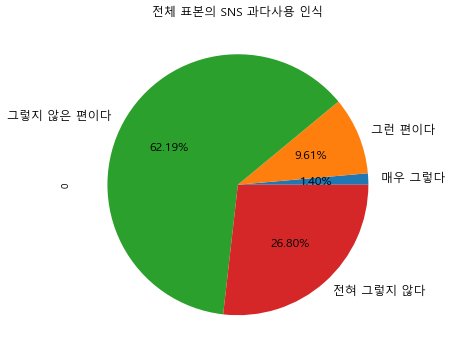

In [206]:
# 전체 표본을 대상으로 SNS 과다사용에 대한 인식 확인
plt.figure(1, figsize=(6,6))
UR_df.iloc[0,1:5].plot.pie(fontsize=12, autopct='%.2f%%')
plt.title("전체 표본의 SNS 과다사용 인식")

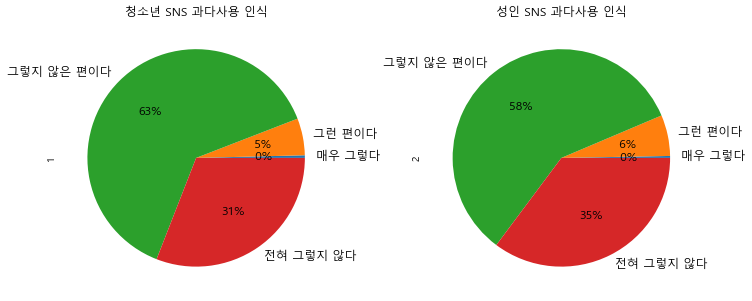

In [212]:
# 청소년과 성인의 SNS 과다사용에 대한 인식 확인
plt.figure(1, figsize=(12, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    UR_df.iloc[i+1, 1:5].plot.pie(fontsize=12, autopct='%2.f%%')
    plt.title("{} SNS 과다사용 인식".format(UR_df['구분'][i+1]))
    
# 청소년이 성인보다 SNS를 과다사용하지 않는다고 생각하는 비율이 높은 것을 알 수 있다.

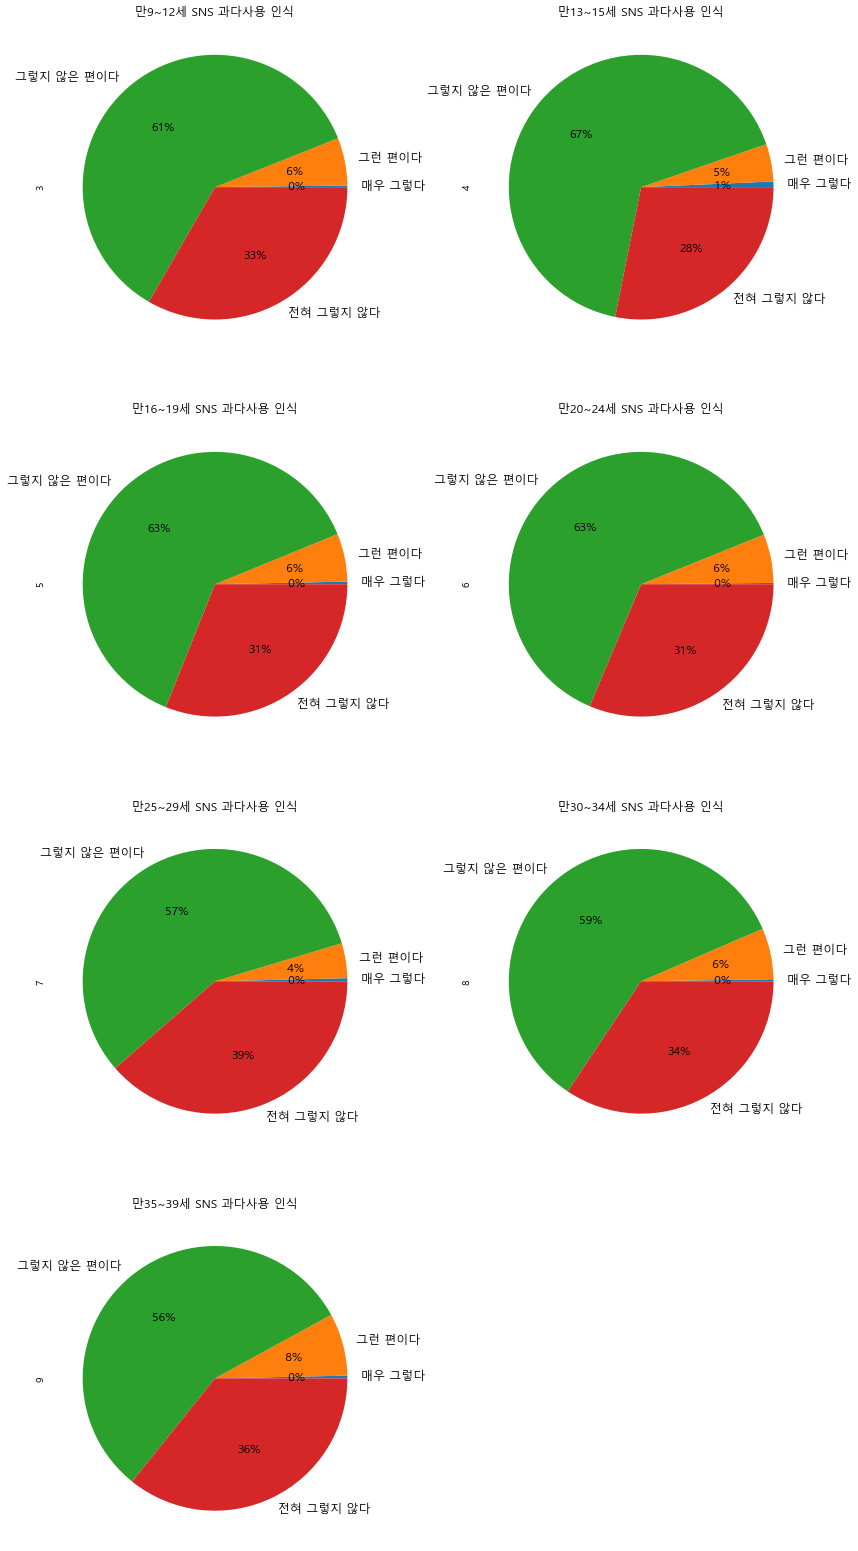

In [219]:
# 나이대별 SNS 과다사용에 대한 인식 확인
plt.figure(1, figsize=(14, 28))
for i in range(7):
    plt.subplot(4, 2, i+1)
    UR_df.iloc[i+3, 1:5].plot.pie(fontsize=12, autopct='%2.f%%')
    plt.title("{} SNS 과다사용 인식".format(UR_df['구분'][i+3]))

# 만 25~29세에서 가장 SNS를 과다사용 하지 않다고 생각하고 있다.
# 먼 35~39세에서 가장 SNS를 과다사용 하고 있다고 생각하고 있다.

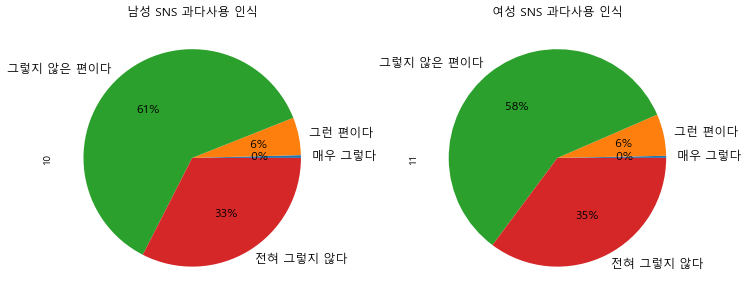

In [253]:
# 성별 SNS 과다사용에 대한 인식 확인
plt.figure(1, figsize=(12, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    UR_df.iloc[i+10, 1:5].plot.pie(fontsize=12, autopct="%2.f%%")
    plt.title("{} SNS 과다사용 인식".format(UR_df['구분'][i+10]))
    
# 성별 SNS 이용시간 분포의 큰 차이는 보이지 않음

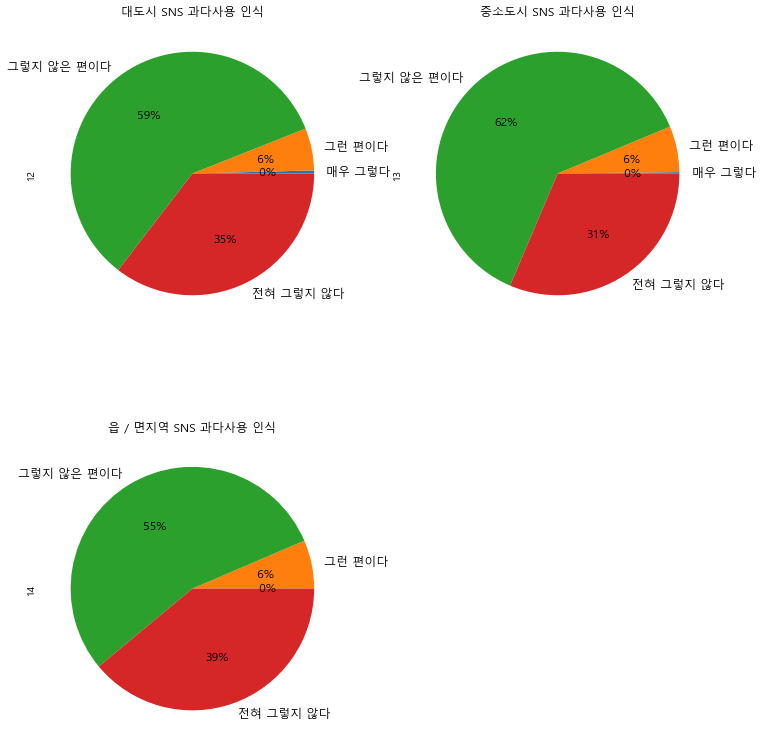

In [218]:
# 도시별 SNS 과다사용에 대한 인식 확인
plt.figure(1, figsize=(12, 14))
for i in range(3):
    plt.subplot(2, 2, i+1)
    UR_df.iloc[i+12, 1:5].plot.pie(fontsize=12, autopct="%2.f%%")
    plt.title("{} SNS 과다사용 인식".format(UR_df['구분'][i+12]))
    
# 도시 분류별 '그런 편이다', '매우 그렇다'의 척도는 동일하나 '그렇지 않은 편이다'와 '전혀 그렇지 않다'는 미비한 차이가 있다

### 2-3) SNS 과다사용으로 발생한 문제 유형에 대한 시각화
- SNS 과다사용으로 발생한 문제 유형은 범주별로 다양하게 나타남
- 주로 학업성적이나 업무효율이 떨어지는 문제가 있는 것으로 판단된다.
- 가족이나 친구관계가 나빠지는 문제는 거의 없는 것으로 판단된다.
- 나이대별과 청소년/성인에 따라 결과 양상이 다르기 때문에 맞춤형 교육이 필요하다.

In [236]:
colors = sns.color_palette('hls',len(UT_df['구분']))

Text(0.5, 1.0, '전체 표본 SNS 과다사용으로 발생한 문제 유형')

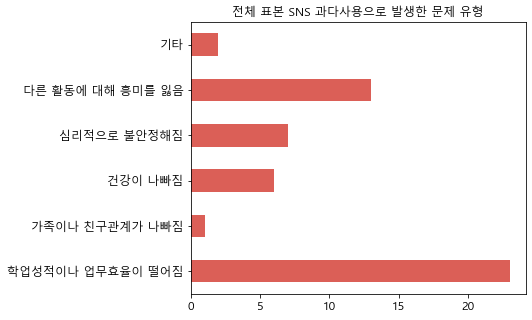

In [245]:
# 전체 표본을 대상으로 SNS 과다사용으로 발생한 문제 유형 확인
plt.figure(1, figsize=(6,5))
UP_df.iloc[0,1:7].plot.barh(color=colors[0], fontsize=12)
plt.title("전체 표본 SNS 과다사용으로 발생한 문제 유형")

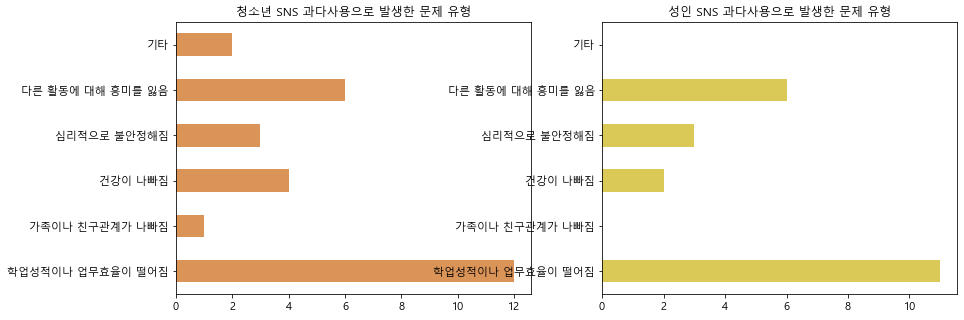

In [247]:
# 청소년과 성인의 SNS 과다사용으로 발생한 문제 유형 확인
plt.figure(1, figsize=(14,5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    UP_df.iloc[i+1, 1:7].plot.barh(color=colors[i+1] ,fontsize=11)
    plt.title("{} SNS 과다사용으로 발생한 문제 유형".format(UP_df['구분'][i+1]))

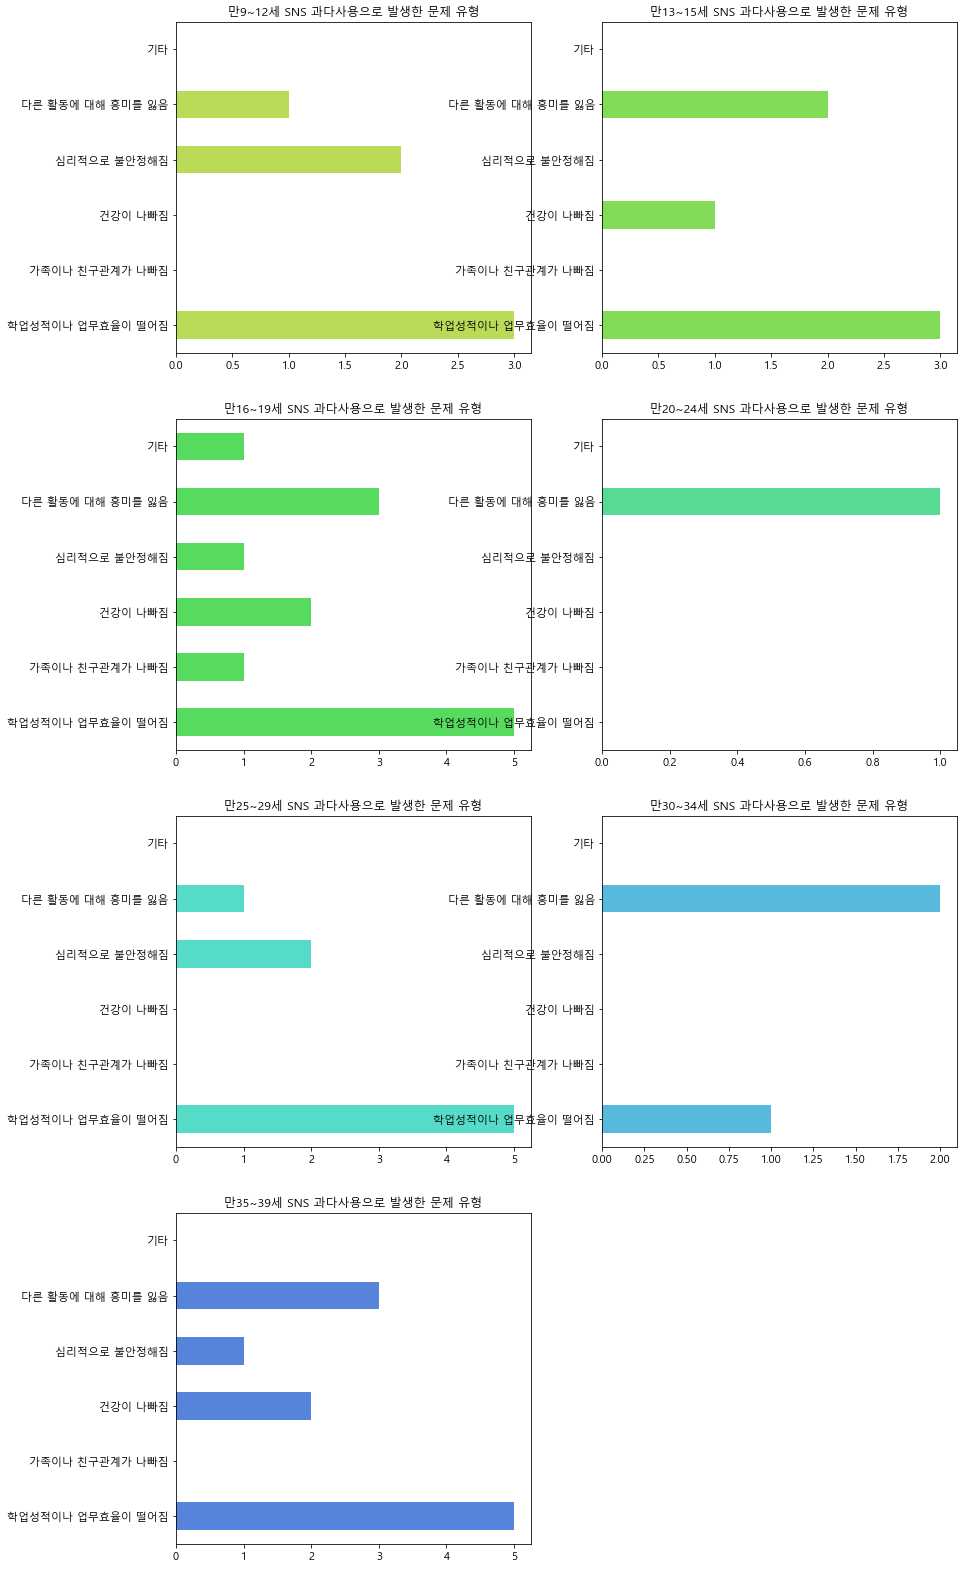

In [249]:
# 나이대별 SNS 과다사용으로 발생한 문제 유형 확인
plt.figure(1, figsize=(14, 28))
for i in range(7):
    plt.subplot(4, 2, i+1)
    UP_df.iloc[i+3, 1:7].plot.barh(color=colors[i+3] ,fontsize=11)
    plt.title("{} SNS 과다사용으로 발생한 문제 유형".format(UP_df['구분'][i+3]))

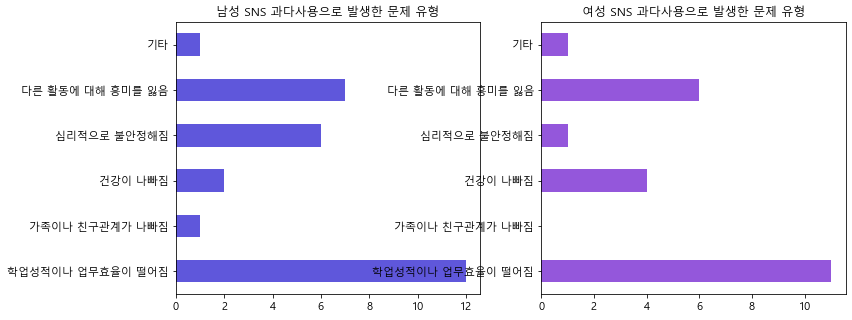

In [254]:
# 성별 SNS 과다사용으로 발생한 문제 유형 확인
plt.figure(1, figsize=(12, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    UP_df.iloc[i+10, 1:7].plot.barh(color=colors[i+10] ,fontsize=11)
    plt.title("{} SNS 과다사용으로 발생한 문제 유형".format(UT_df['구분'][i+10]))

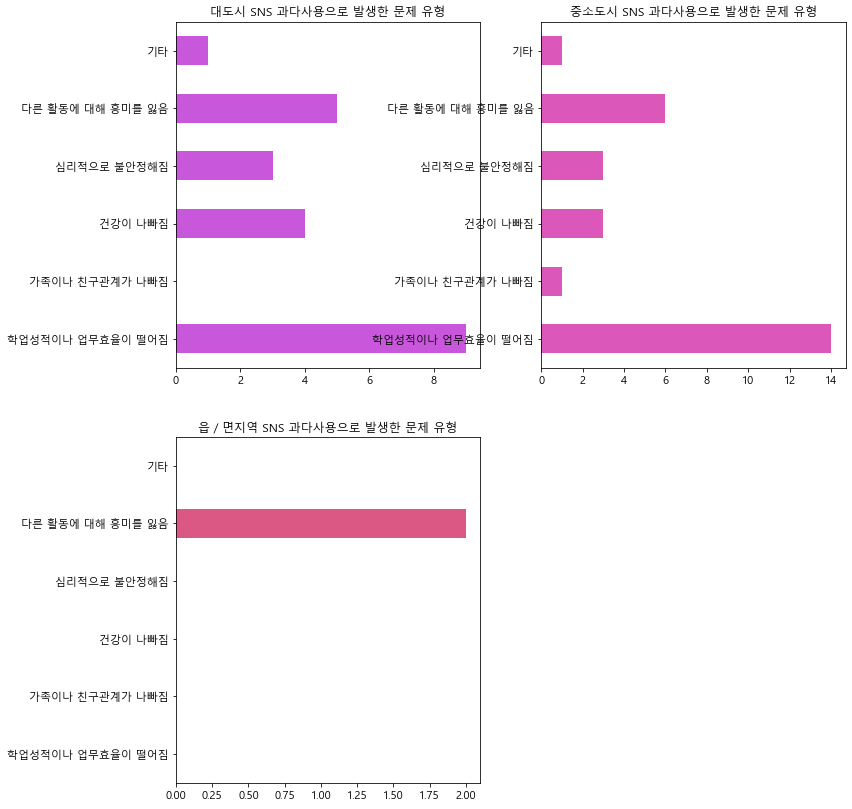

In [251]:
# 도시별 SNS 과다사용으로 발생한 문제 유형 확인
plt.figure(1, figsize=(12, 14))
for i in range(3):
    plt.subplot(2, 2, i+1)
    UP_df.iloc[i+12, 1:7].plot.barh(color=colors[i+12] ,fontsize=11)
    plt.title("{} SNS 과다사용으로 발생한 문제 유형".format(UP_df['구분'][i+12]))